<a href="https://colab.research.google.com/github/VudathaVarsha/AIML-IIIT/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

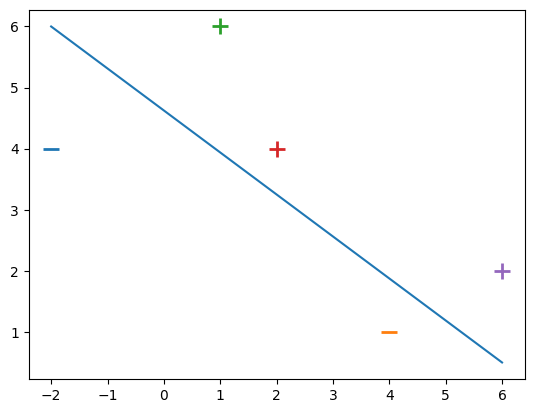

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

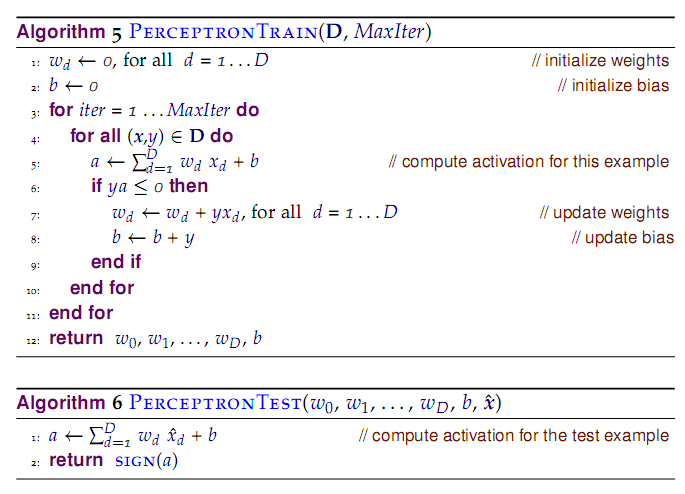

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

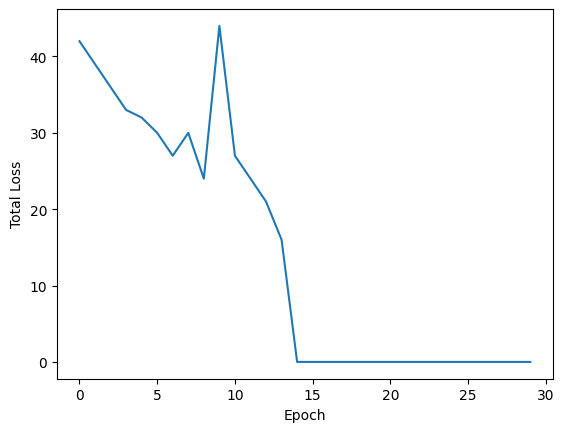

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

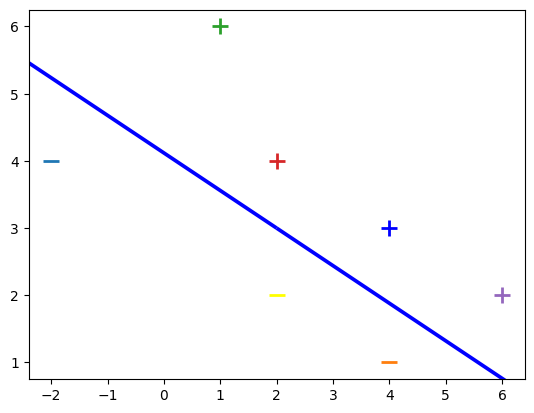

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



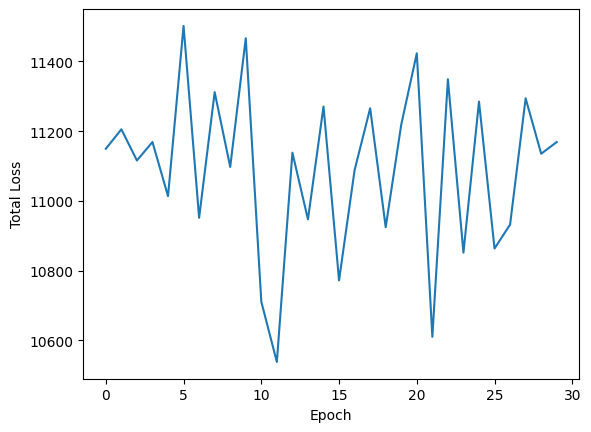

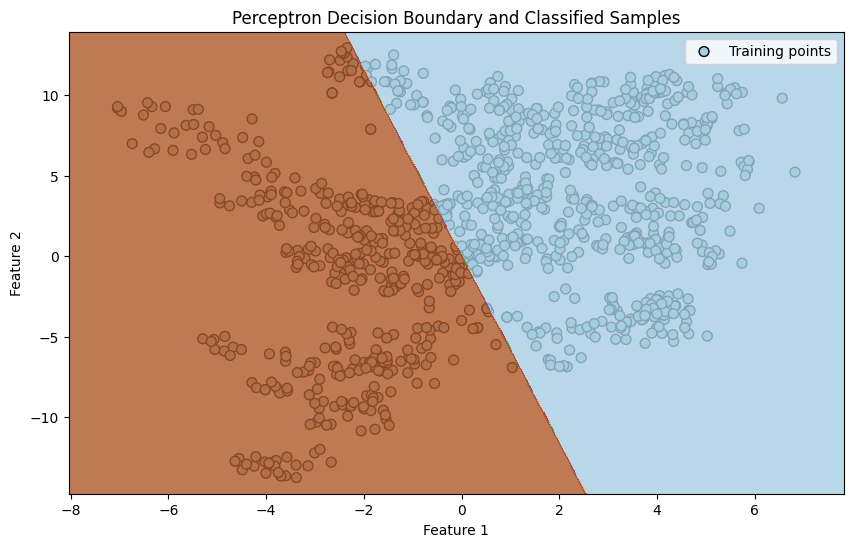

In [17]:
#1.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Banknote Authentication dataset
banknote = datasets.fetch_openml(name='banknote-authentication', version=1, as_frame=False)
X = banknote.data
y = banknote.target.astype(int)

# Assuming X has more than two features, use only the first two for visualization
X = X[:, :2]

# Define labels as +1 or -1 for perceptron algorithm
y_binary = np.where(y == 0, -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train perceptron and plot the total loss at each epoch
trained_weights = perceptron_algo_plot(X_train, y_train)

# Plot the decision boundary and classified samples
plt.figure(figsize=(10, 6))

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50, label='Training points')

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], trained_weights)
Z = np.sign(Z)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.title('Perceptron Decision Boundary and Classified Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

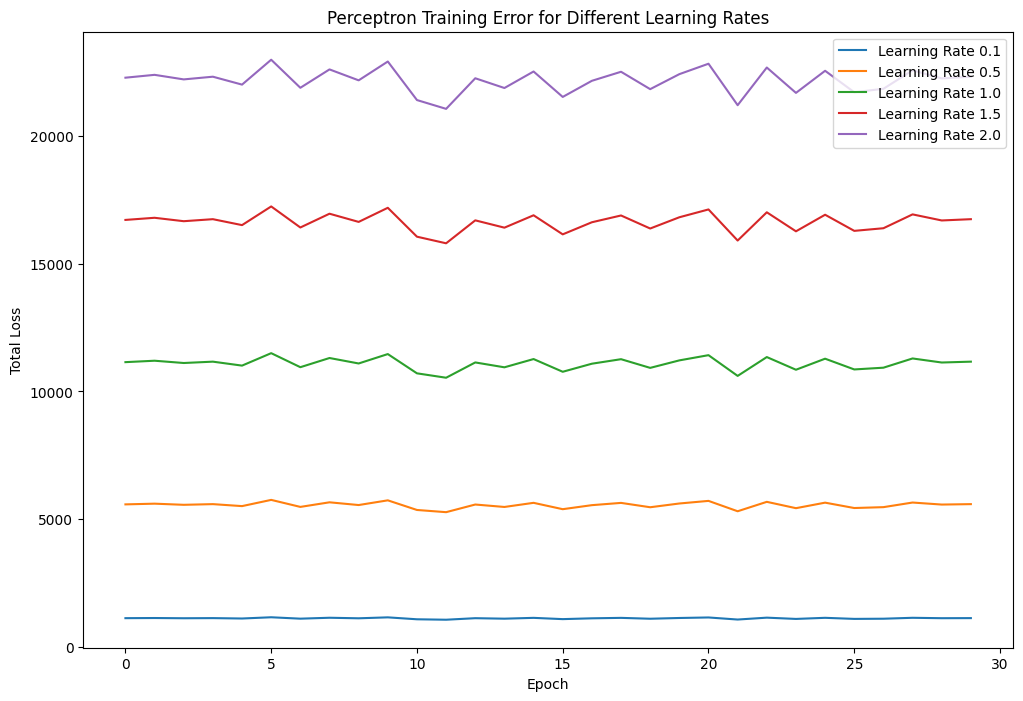

In [18]:
#2.
def perceptron_algo_plot(X, Y, learning_rate=1.0):
    '''
    Train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :param learning_rate: learning rate for the perceptron algorithm
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

# Experiment with different learning rates
learning_rates = [0.1, 0.5, 1.0, 1.5, 2.0]

plt.figure(figsize=(12, 8))

for rate in learning_rates:
    trained_weights = perceptron_algo_plot(X_train, y_train, learning_rate=rate)
    plt.legend(["Learning Rate {}".format(rate) for rate in learning_rates])

plt.title('Perceptron Training Error for Different Learning Rates')
plt.show()

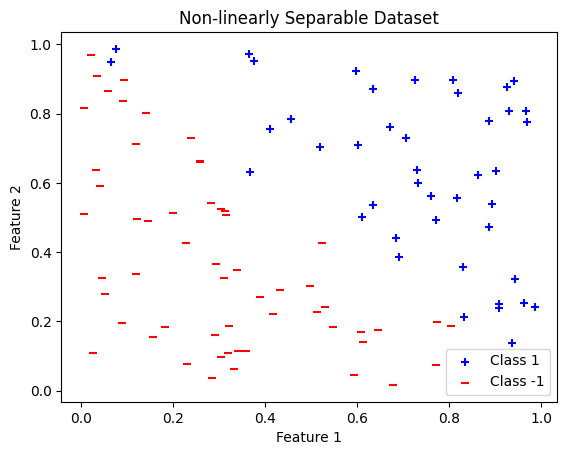

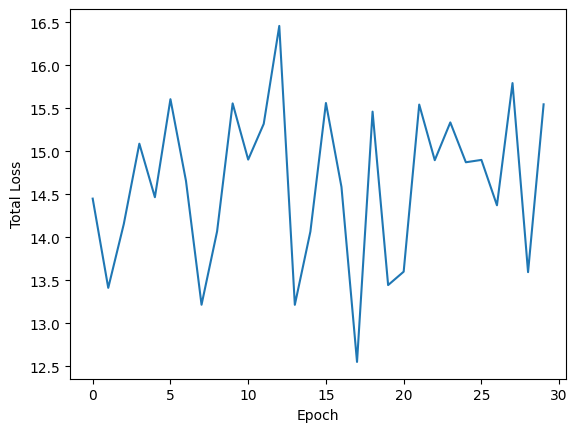

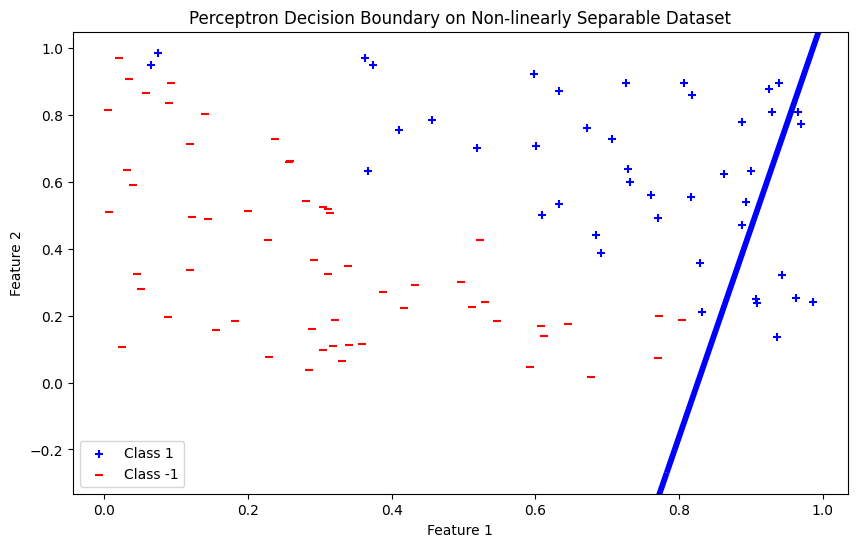

In [19]:
#3.
import numpy as np
import matplotlib.pyplot as plt

# Generate a non-linearly separable toy dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)

# Plot the dataset
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='+', label='Class 1', c='blue')
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='_', label='Class -1', c='red')
plt.title('Non-linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Run perceptron algorithm
w_non_linear = perceptron_algo_plot(X, y)

# Plot the decision boundary and classified samples
plt.figure(figsize=(10, 6))

# Plot the training points
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='+', label='Class 1', c='blue')
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='_', label='Class -1', c='red')

# Print the hyperplane calculated by perceptron_algo_plot()
x2 = [w_non_linear[0], w_non_linear[1], -w_non_linear[1], w_non_linear[0]]
x3 = [w_non_linear[0], w_non_linear[1], w_non_linear[1], -w_non_linear[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

plt.title('Perceptron Decision Boundary on Non-linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In this case, the perceptron algorithm may not find a hyperplane that perfectly separates the classes due to the non-linear nature of the dataset. We can observe that the perceptron algorithm fails to converge, and the decision boundary does not correctly classify all the samples.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


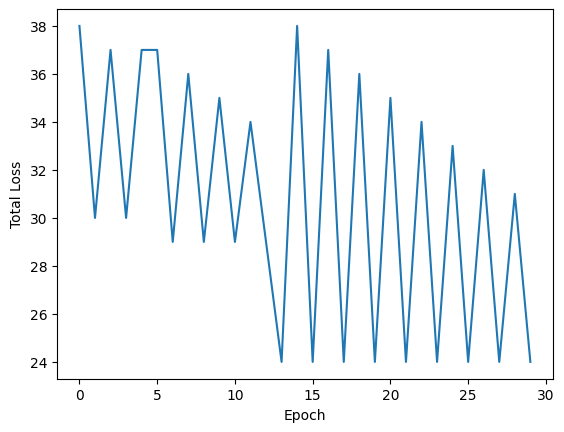

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.